# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Karin Brinksma 13919938 Dominique Weltevreden 12161160

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
/
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

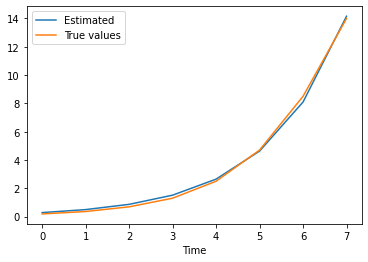

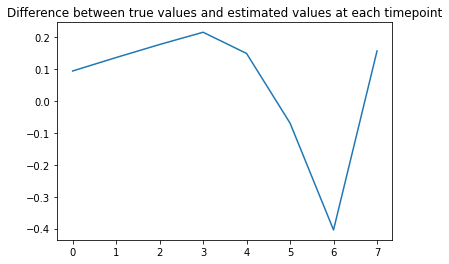

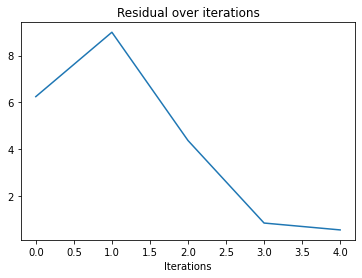

In [2]:
def fit_function(input_values, t):
    x1 = input_values[0]
    x2 = input_values[1]
    return x1 * x2 ** t

def gauss_newton(input_values, true_y):
    """
    The Gauss-Newton method to fit the model function given above, to the data; finds estimates for the initial values
    based on the given data.
    Input:
    input_values    = (2,) array with initial input values for the function (x0)
    true_y          = list of datapoints that the model should approximate
    
    Output:
    Mostly for plotting purposes.
    est_y           = estimated y values for the function based on the input values found
    timesteps       = list of values aranged between 0 and the length of true_y; for plotting purposes
    saved_residuals = list of residual values per loop
    k               = number of loops needed for convergence
    
    """
    # Get the length of the y vector
    n = len(true_y)
    
    # Arrange the timesteps over n to loop over this
    timesteps = np.arange(n)
    
    # Create an empty matrix to fill with derivatives; dimensions equal to length true_y 
    # x nr of first derivatives
    jacobian = np.empty([n, 2])
    
    # Initialize summed_res(iduals) at a high number for the while statement
    summed_res = 100
    
    # Initialize k to count the loops
    k = 0
    
    # Save residuals per loop
    saved_residuals = []
    
    
    # Keep running until convergence, arbitrarily set at a residual of <0.75
    while k < 1000 and summed_res > 0.75:
        k += 1
        
        # Get estimated y values based on the current input values
        # Input values has to be an iterable for the map function to work
        est_y = list(map(fit_function, [input_values] * n, timesteps))
        
        # Calculate residuals between the estimated and true y values
        residual = np.array(est_y) - np.array(true_y)
        summed_res = np.linalg.norm(residual)
        saved_residuals.append(summed_res)
        
        # Fill the Jacobian
        for t in timesteps:
            
            # Derivative over x1
            dx1 = - input_values[1] ** t
            
            # Derivative over x2
            dx2 = - input_values[0] * t * input_values[1] ** (t - 1)
            jacobian[t, 0] = dx1
            jacobian[t, 1] = dx2


        # Alternative methods to solve Js = r for s; the least squares method worked better so is currently implemented
        #s = np.linalg.solve(jacobian.T @ jacobian, jacobian.T @ - residual)
        s = np.linalg.lstsq(jacobian, - residual, None)[0]
        
        # Update input values with s
        input_values = input_values - s
    
    return est_y, timesteps, saved_residuals, k

P0 = 0.5
growth_rate = 1.5
start_rates = np.array([P0, growth_rate])
y, time, residuals, k = gauss_newton(start_rates, data)

# Plotting
k_space = np.arange(k)
plt.plot(time, y, label = "Estimated")
plt.plot(time, data, label = "True values")
plt.xlabel("Time")
plt.legend()
plt.show()

plt.plot(time, np.array(y)-np.array(data))
plt.title("Difference between true values and estimated values at each timepoint")
plt.show()

plt.title("Residual over iterations")
plt.plot(k_space, residuals)
plt.xlabel("Iterations")
plt.show()



# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


In [3]:
# def fit_function(initial, t):
#     x1 = initial[0]
#     x2 = initial[1]
#     return x1 * x2 ** t

# def get_F(T, initial, t):
#     return T * fit_function(initial, t)

# def get_Y(T, y):
#     return T @ y

# def least_squares_problem(initial, t, true_y):
    
#     # Define sigma
#     sigma = [x * 0.05 for x in y]
    
#     # Create T diagonal matrix
#     I = np.identity(len(y))
#     T = sigma * I
    
#     # Dit werkt niet want je hebt geen loop verder ergens dus nu is t een enkele waarde; moet een array zijn uiteindelijk
#     F = get_F(T, initial, t)
#     Y = get_Y(T, y)
#     residual = np.linalg.norm(F - Y)**2
#     return optimize.minimize(1/2 * residual, initial)


# y = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# P0 = 100
# growth_rate = 0.05
# start_rates = np.array([P0, growth_rate])
# timesteps = np.arange(len(y))

# print(least_squares_problem(start_rates, timesteps, y))

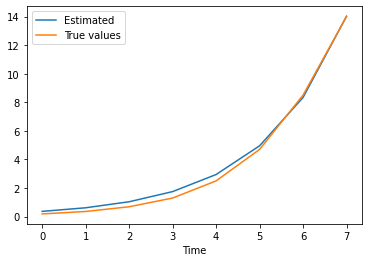

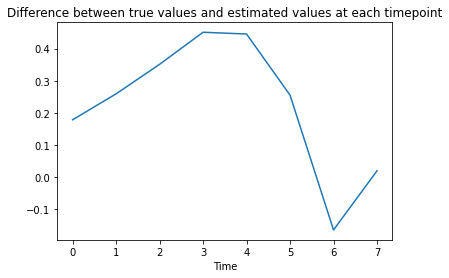

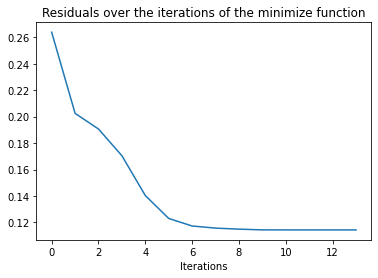

In [6]:
all_residuals = []
global all_residuals

# global iterations
# iterations = 0


def weighted_lsq(input_values, true_y):
    n = len(true_y)
    timesteps = np.arange(n)
    
    # Define sigma
    sigma = [x * 0.05 for x in y]
    
    # Create T diagonal matrix
    I = np.identity(n)
    T = sigma * I
    
    # Get the estimated y values per the function with the current input values
    est_y = list(map(fit_function, [input_values] * n, timesteps))
    
    # Create F and Y matrix using T
    F = T @ est_y
    Y = T @ true_y
    
# global iterations
#     iterations += 1
    
    # Calculate residual
    residual = np.linalg.norm(F - Y)
#     all_residuals.append(residual)

    
    # Return 0.5 * residual, as per formula above
    return 1/2 * residual
    
def callback_attempt(input_values):
    # Data is added to this callback function as it can only get one argument in callback
    data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]
    
    # Calculate and append residual for this input value
    return all_residuals.append(2 * weighted_lsq(input_values, data))

P0 = 0.5
growth_rate = 1.5
start_rates = np.array([P0, growth_rate])

# Minimize the residual by adjusting the starting values
result = optimize.minimize(fun = weighted_lsq, x0 = start_rates, args = data, callback = callback_attempt)
x_val = result["x"]
k = result["nit"]


# For some reason the iterations from counting function calls is more than when using the callback function;
# bit odd so i'm going to use the callback function  
# print(iterations)
# print(len(all_residuals))
# plt.plot(np.arange(iterations), all_residuals)
# plt.show()


# Find y for the x from the minimize function
est_y = list(map(fit_function, [x_val] * len(data), time))


# Plot
timesteps = np.arange(len(data))
plt.plot(time, est_y, label = "Estimated")
plt.plot(time, data, label = "True values")
plt.xlabel("Time")
plt.legend()
plt.show()
    
plt.plot(time, np.array(est_y)-np.array(data))
plt.title("Difference between true values and estimated values at each timepoint")
plt.xlabel("Time")
plt.show()


plt.plot(np.arange(k), all_residuals)
plt.title("Residuals over the iterations of the minimize function")
plt.xlabel("Iterations")
plt.show()



This method seems to be better conditioned, as even when shifting the initial growth and initial population around, the method converges, where an extremely different growth rate in a) would mean that the model would not arrive at the right value for the initial values; instead, it would go off in one direction dramatically. 

Even with identical initial values for r and Y0, the residuals for the weighted method are significantly lower, even at early iterations. The model seems to need more iterations to converge, but this can also be as our threshold for convergence in the Gauss-Newton method is set higher as it is a hyperparameter not built into any functions. 

Both methods give an accurate approximation to the true data, with residuals being small.

----------------------
# Exercise 2 (4.5 points)



In [8]:
global xVals
xVals = []

# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

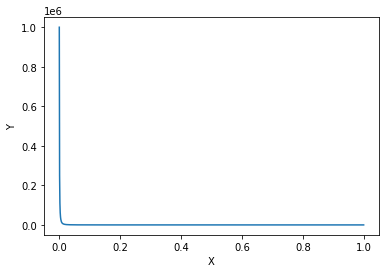

In [9]:
def function(x):
    """
    Input: the value x for which to evaluate the function
    Output: f(x)
    """
    xVals.append(x)
    return 1 / (x ** 2)


a = 10**-3
b = 1
x_val = np.arange(a, b, 0.001)
y_val = list(map(function, x_val))
    
plt.plot(x_val, y_val)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [10]:
y, error = integrate.quad(function, 10**-3, 1, epsabs=10**-4)
print("The result is:", y)
print("The error is:", error)

The result is: 999.0000000000119
The error is: 7.671666060337136e-05


# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


<ipython-input-11-d670afbc836d>:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  y = integrate.quad(function, 0, 1)


Text(0.5, 1.0, 'Number of function evaluations in bin')

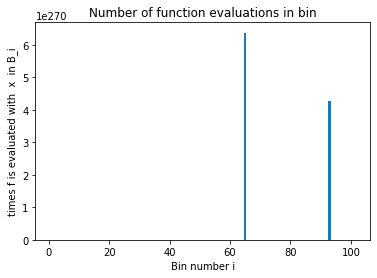

In [11]:
h = 0.01
B = []
end_bin = 0
i = 1
# Make bins until the upper limit of the bin is greater than 1
while end_bin <= 1:
    start_bin = h * (i-1)
    end_bin = h*i
    i += 1
    B.append([start_bin, end_bin])
    
# Make list for all the x's for which f is evaluated
xVals = []
y = integrate.quad(function, 0, 1)

# For each bin  𝐵𝑖 , count the number of times  𝑓(𝑥)  is evaluated with 𝑥 in 𝐵𝑖
Bcount = np.empty(len(B))
for x in xVals:
    for idx in range(len(B)):
        if ((x >= B[idx][0]) and (x <= B[idx][1])):
            Bcount[idx] += 1

# Plot the bin count in a histogram, The first bin gets number 1
plt.bar(np.arange(1, len(Bcount)+1), Bcount)
plt.xlabel("Bin number i")
plt.ylabel("times f is evaluated with  x  in B_i")
plt.title("Number of function evaluations in bin")

There is a large number of evaluations at the beginning of the region. If we look at f(x) we see that f(x) is high at very low values of x and then drops very quickly as x increase to 1. As x increases to 1, f(x) is almost zero, changing very little. The integral is harder to evaluate when it changes very rapidly as a function of x. Therefore, it makes sense that a nadaptive quadrature strategy, as is used by integrate.quad, would sample more points for in the region where x is very low  